In [1]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Exploratory Data Analysis

In [4]:
# import  data
df=pd.read_csv('framingham.csv')

In [5]:
# brief look of data
df.head(30)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [6]:
# data shape
df.shape

(4238, 16)

In [7]:
# a summary of columns count and its dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
# check duplicates
duplicates = df[df.duplicated()]
duplicates

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [9]:
# check  if any missing values
df.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [10]:
# Finding the count of missing values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
# Dropping the rows with missing values
df.dropna(axis=0,inplace=True)

In [12]:
#Verify the rows with missing values are removed 
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Visualization 

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

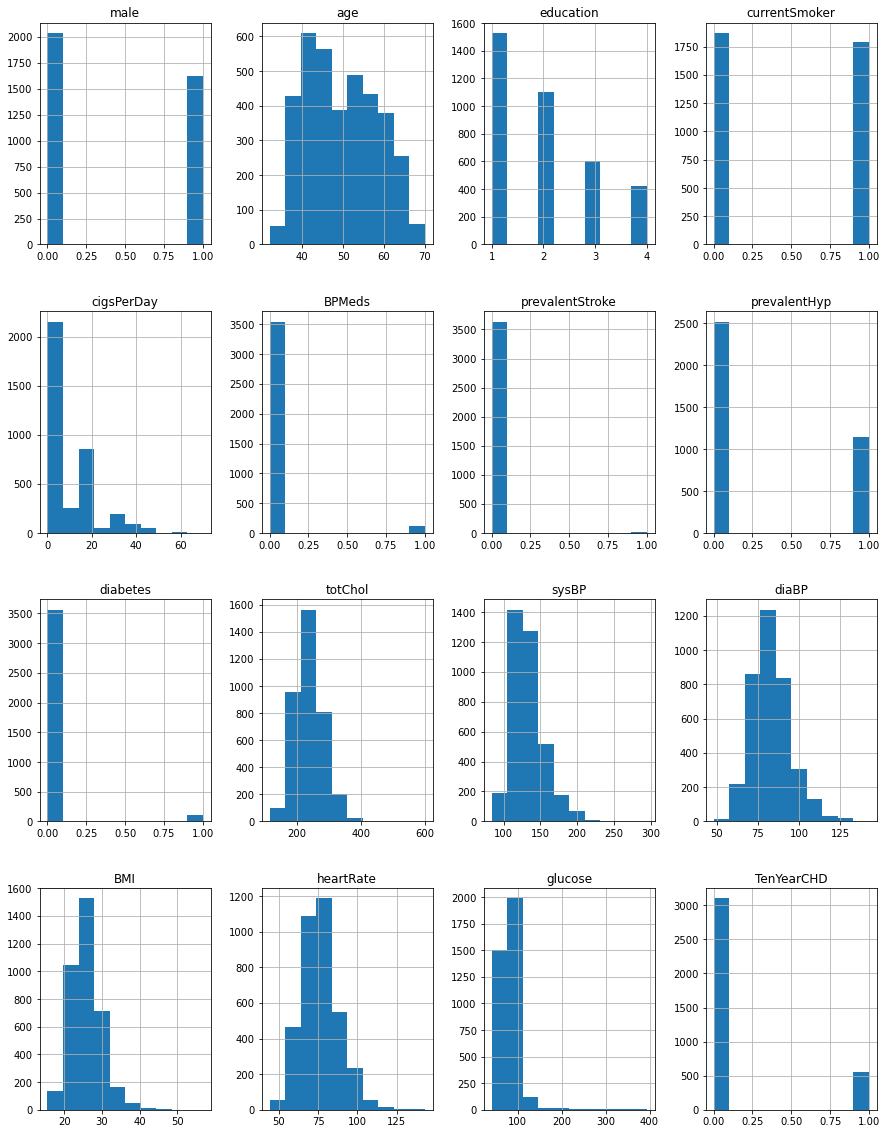

In [13]:
# check distributions of data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

df.columns

In [14]:
#The education,male column is dropped
df.drop(columns=['education','male'],inplace=True)

<Figure size 1152x432 with 0 Axes>

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Patients_count')

Text(0.5, 0, 'age')

Text(0, 0.5, 'Counts')

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

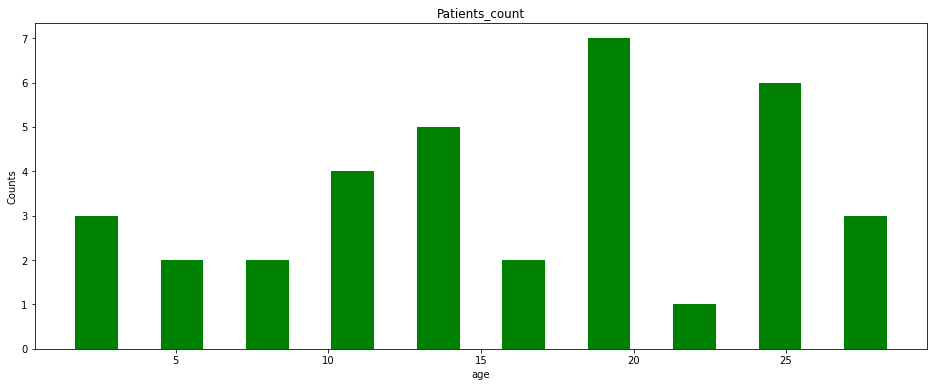

In [15]:
plt.figure(figsize=(16,6))
df['age'][df['TenYearCHD']==1].value_counts().sort_index().plot.hist(rwidth=0.5,color='green')
plt.title('Patients_count')
plt.xlabel('age')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

<Figure size 1152x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Prediction of CHD')

Text(0.5, 0, 'currentSmoker')

Text(0, 0.5, 'Counts')

([<matplotlib.axis.XTick at 0x13e4518aa00>,
 [Text(0, 0, 'Not currentSmoker'), Text(1, 0, 'currentSmoker')])

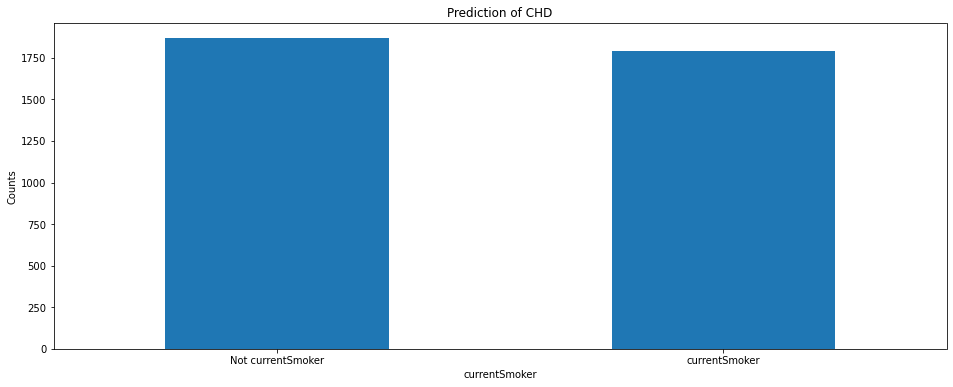

In [16]:
plt.figure(figsize=(16,6))
df['currentSmoker'].value_counts().plot.bar()
plt.title('Prediction of CHD')
plt.xlabel('currentSmoker')
plt.ylabel('Counts')
plt.xticks([0,1],['Not currentSmoker','currentSmoker'],rotation=0)
plt.show()

<Figure size 1152x432 with 0 Axes>

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Patients_count')

Text(0.5, 0, 'cigsPerDay')

Text(0, 0.5, 'Counts')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

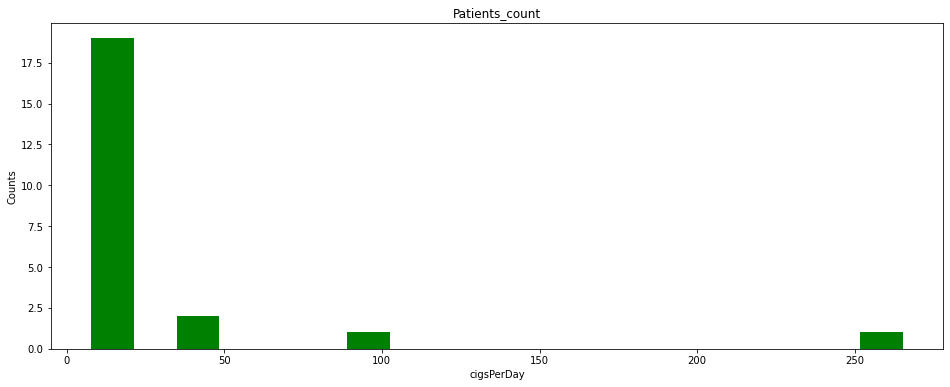

In [17]:
plt.figure(figsize=(16,6))
df['cigsPerDay'][df['TenYearCHD']==1].value_counts().sort_index().plot.hist(rwidth=0.5,color='green')
plt.title('Patients_count')
plt.xlabel('cigsPerDay')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

<Figure size 1152x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Prediction of CHD')

Text(0.5, 0, 'BPMeds')

Text(0, 0.5, 'Counts')

([<matplotlib.axis.XTick at 0x13e4556fd30>,
 [Text(0, 0, 'Not BPMeds'), Text(1, 0, 'BPMeds')])

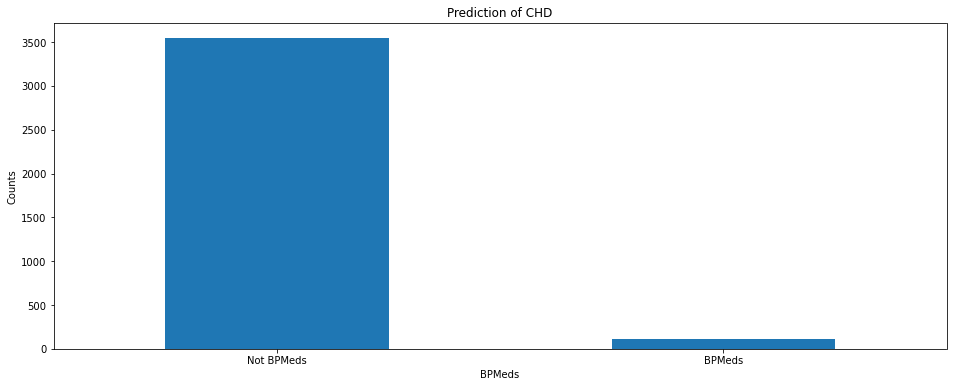

In [18]:
plt.figure(figsize=(16,6))
df['BPMeds'].value_counts().plot.bar()
plt.title('Prediction of CHD')
plt.xlabel('BPMeds')
plt.ylabel('Counts')
plt.xticks([0,1],['Not BPMeds','BPMeds'],rotation=0)
plt.show()

<Figure size 1152x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Patients_count')

Text(0.5, 0, 'prevalentStroke')

Text(0, 0.5, 'Counts')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

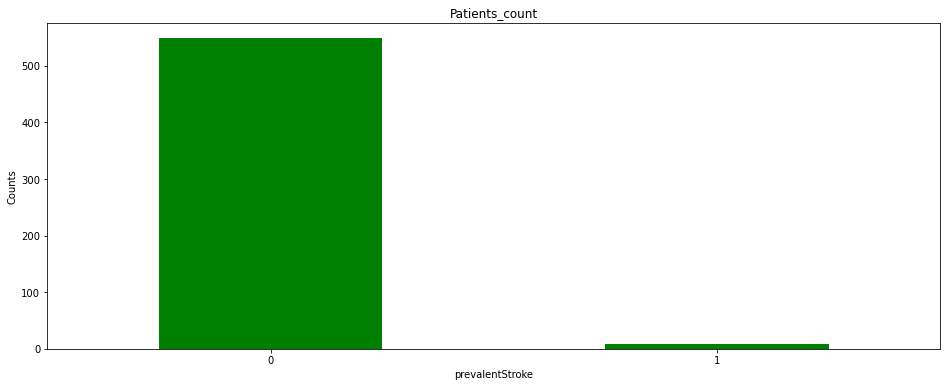

In [19]:
plt.figure(figsize=(16,6))
df['prevalentStroke'][df['TenYearCHD']==1].value_counts().sort_index().plot.bar(color='green')
plt.title('Patients_count')
plt.xlabel('prevalentStroke')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

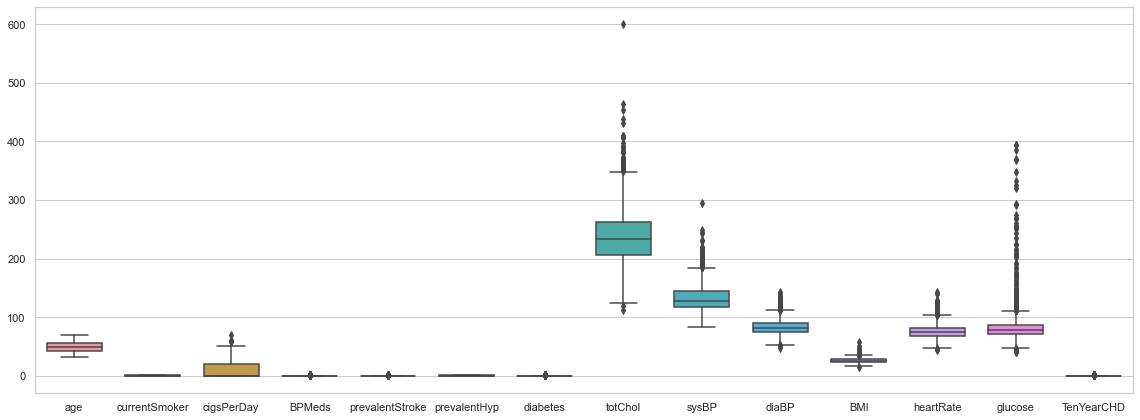

In [20]:
sns.set(style='whitegrid')
fig, ax=plt.subplots(figsize=(16,6))
g=sns.boxplot(data=df, width=0.7)
x=['sysBP','glucose','age','totChol','cigsPerDay','diaBP']
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='totChol'>

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1


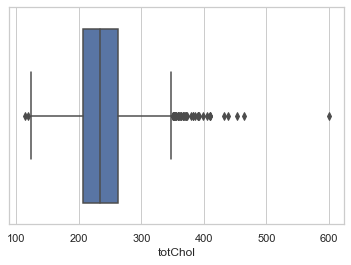

In [21]:
sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

<AxesSubplot:xlabel='totChol'>

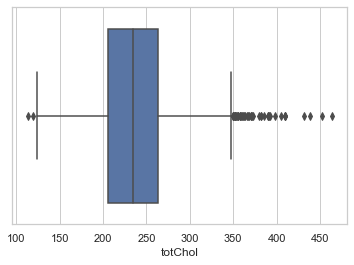

In [22]:
# Dropping the outliers in totChol column
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease before Resampling\n')

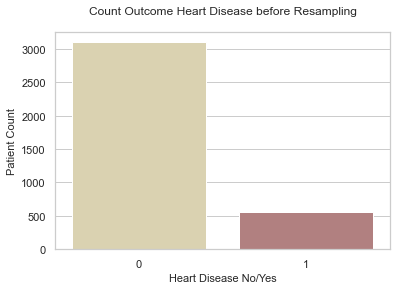

In [23]:
# Check for balance in dataset
sns.countplot(df.TenYearCHD, palette="pink_r")
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease before Resampling\n')
plt.show()

0    611
1    556
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

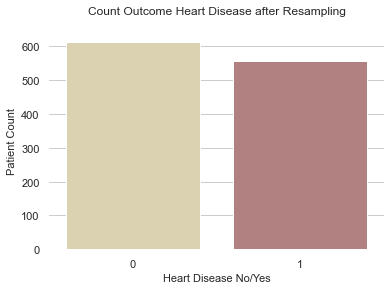

In [24]:
# Balance the data
shuffled_df = df.sample(frac=1,random_state=4)

CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)
normalized_df = pd.concat([CHD_df, non_CHD_df])
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="pink_r")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

In [25]:
normalized_df

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1058,52,0,0.0,0.0,0,1,0,240.0,177.0,103.5,24.39,86.0,75.0,1
4233,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
1631,58,0,0.0,0.0,0,1,0,312.0,161.0,100.5,21.51,75.0,64.0,1
3906,47,0,0.0,0.0,0,0,0,230.0,137.0,79.0,27.13,75.0,76.0,1
4232,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,43,1,40.0,0.0,0,1,0,212.0,135.0,86.0,30.22,100.0,75.0,0
4083,46,0,0.0,0.0,0,0,0,247.0,115.0,71.0,27.72,82.0,69.0,0
1841,41,0,0.0,0.0,0,0,0,256.0,107.0,73.0,26.38,60.0,65.0,0
960,49,0,0.0,0.0,0,0,0,261.0,123.5,84.0,20.94,75.0,75.0,0


# Train & Test

In [26]:
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis = 1)

In [27]:
df.columns

Index(['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [28]:
X
y

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3655, dtype: int64

In [29]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [31]:
X_test.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2285,48,0,0.0,0.0,0,1,0,251.0,148.0,91.0,25.79,75.0,83.0
492,46,1,10.0,0.0,0,0,0,269.0,134.0,78.0,26.80,105.0,104.0
3984,51,0,0.0,0.0,0,0,0,199.0,113.0,68.0,22.46,58.0,68.0
2811,40,1,9.0,0.0,0,0,0,193.0,105.0,60.0,22.54,75.0,85.0
3022,59,0,0.0,0.0,0,1,0,250.0,120.5,80.5,27.59,80.0,75.0


# Modeling & Evaluation

In [32]:
LR=LogisticRegression(random_state=0,max_iter=3000)

LR.fit(X_train, y_train)

LR_p = LR.predict(X_test)

accLR = accuracy_score(y_test, LR_p)
print(f"The accuracy score: {round(accLR,3)*100}%")

f1 = f1_score(y_test, LR_p)
print(f"The f1 score: {round(f1,3)*100}%")

precision = precision_score(y_test, LR_p)
print(f"The precision score: {round(precision,3)*100}%")

recall = recall_score(y_test, LR_p)
print(f"The recall score: {round(recall,3)*100}%")

LogisticRegression(max_iter=3000, random_state=0)

The accuracy score: 85.7%
The f1 score: 17.599999999999998%
The precision score: 70.0%
The recall score: 10.100000000000001%


In [33]:
X_test

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2285,48,0,0.0,0.0,0,1,0,251.0,148.0,91.0,25.79,75.0,83.0
492,46,1,10.0,0.0,0,0,0,269.0,134.0,78.0,26.80,105.0,104.0
3984,51,0,0.0,0.0,0,0,0,199.0,113.0,68.0,22.46,58.0,68.0
2811,40,1,9.0,0.0,0,0,0,193.0,105.0,60.0,22.54,75.0,85.0
3022,59,0,0.0,0.0,0,1,0,250.0,120.5,80.5,27.59,80.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,58,0,0.0,0.0,0,1,0,223.0,146.5,77.5,21.47,75.0,85.0
579,59,0,0.0,0.0,0,0,0,300.0,163.0,78.0,28.83,53.0,95.0
1903,48,0,0.0,0.0,0,0,0,186.0,107.0,76.0,26.39,65.0,90.0
1207,41,0,0.0,0.0,0,0,0,205.0,110.0,69.0,25.99,75.0,67.0


In [34]:
ADA=AdaBoostClassifier()

ADA.fit(X_train, y_train)

ADA_p = ADA.predict(X_test)

accADA = accuracy_score(y_test, ADA_p)
print(f"The accuracy score: {round(accADA,3)*100}%")

f1 = f1_score(y_test, ADA_p)
print(f"The f1 score: {round(f1,3)*100}%")

precision = precision_score(y_test, ADA_p)
print(f"The precision score: {round(precision,3)*100}%")

recall = recall_score(y_test, ADA_p)
print(f"The recall score: {round(recall,3)*100}%")

AdaBoostClassifier()

The accuracy score: 84.7%
The f1 score: 14.6%
The precision score: 48.0%
The recall score: 8.6%


In [35]:
RF=RandomForestClassifier(max_features='auto', n_estimators=200)
RF.fit(X_train, y_train)

RF_p = RF.predict(X_test)

accRF = accuracy_score(y_test, RF_p)
print(f"The accuracy score: {round(accRF,3)*100}%")

f1 = f1_score(y_test, RF_p)
print(f"The f1 score: {round(f1,3)*100}%")

precision = precision_score(y_test, RF_p)
print(f"The precision score: {round(precision,3)*100}%")

recall = recall_score(y_test, RF_p)
print(f"The recall score: {round(recall,3)*100}%")

RandomForestClassifier(n_estimators=200)

The accuracy score: 84.6%
The f1 score: 5.4%
The precision score: 40.0%
The recall score: 2.9000000000000004%


In [36]:
DC=DecisionTreeClassifier()

DC.fit(X_train, y_train)

DC_p = DC.predict(X_test)

accDC = accuracy_score(y_test, DC_p)
print(f"The accuracy score: {round(accDC,3)*100}%")

f1 = f1_score(y_test, DC_p)
print(f"The f1 score: {round(f1,3)*100}%")

precision = precision_score(y_test, DC_p)
print(f"The precision score: {round(precision,3)*100}%")

recall = recall_score(y_test, DC_p)
print(f"The recall score: {round(recall,3)*100}%")

DecisionTreeClassifier()

The accuracy score: 74.6%
The f1 score: 23.7%
The precision score: 21.8%
The recall score: 25.900000000000002%


In [37]:
GB=GaussianNB()
GB.fit(X_train,y_train)

gb_p= GB.predict(X_test)

accGB = accuracy_score(y_test, gb_p)
print(f"The accuracy score: {round(accGB,3)*100}%")

f1 = f1_score(y_test, gb_p)
print(f"The f1 score: {round(f1,3)*100}%")

precision = precision_score(y_test, gb_p)
print(f"The precision score: {round(precision,3)*100}%")

recall = recall_score(y_test, gb_p)
print(f"The recall score: {round(recall,3)*100}%")

GaussianNB()

The accuracy score: 83.0%
The f1 score: 27.900000000000002%
The precision score: 39.5%
The recall score: 21.6%


In [38]:
knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train, y_train)

knn_p= knn.predict(X_test)

accKNN = accuracy_score(y_test, knn_p)
print(f"The accuracy score: {round(accKNN,3)*100}%")

f1 = f1_score(y_test, knn_p)
print(f"The f1 score: {round(f1,3)*100}%")

precision = precision_score(y_test, knn_p)
print(f"The precision score: {round(precision,3)*100}%")

recall = recall_score(y_test, knn_p)
print(f"The recall score: {round(recall,3)*100}%")

KNeighborsClassifier(n_neighbors=2)

The accuracy score: 83.89999999999999%
The f1 score: 8.7%
The precision score: 31.8%
The recall score: 5.0%


<Figure size 1152x432 with 0 Axes>

<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Accuracy Graph')

Text(0.5, 0, 'Algorithm')

Text(0, 0.5, 'Percentage')

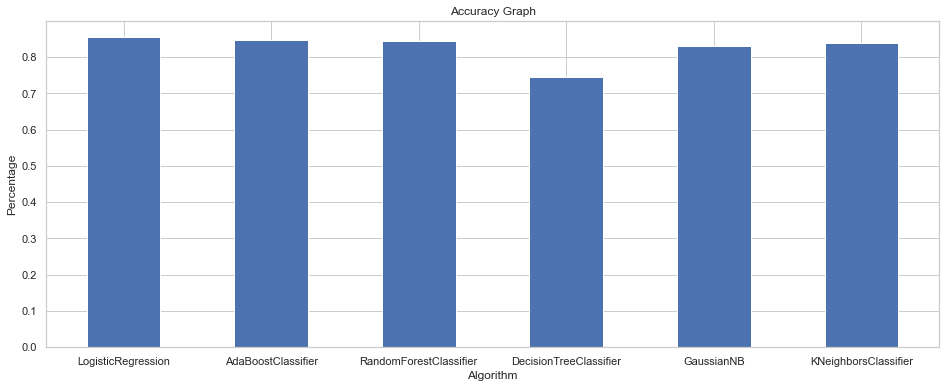

In [39]:
# Comparing the accuracy score
a=["LogisticRegression","AdaBoostClassifier","RandomForestClassifier","DecisionTreeClassifier",
   "GaussianNB","KNeighborsClassifier"]
b=[accLR,accADA,accRF,accDC,accGB,accKNN]
plt.figure(figsize=(16,6))
plt.bar(a,b,width=0.5)
plt.title("Accuracy Graph")
plt.xlabel("Algorithm")
plt.ylabel("Percentage")
plt.show()

RESULT: Logistic Regression predicts with high accuracy

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3655 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3655 non-null   int64  
 1   currentSmoker    3655 non-null   int64  
 2   cigsPerDay       3655 non-null   float64
 3   BPMeds           3655 non-null   float64
 4   prevalentStroke  3655 non-null   int64  
 5   prevalentHyp     3655 non-null   int64  
 6   diabetes         3655 non-null   int64  
 7   totChol          3655 non-null   float64
 8   sysBP            3655 non-null   float64
 9   diaBP            3655 non-null   float64
 10  BMI              3655 non-null   float64
 11  heartRate        3655 non-null   float64
 12  glucose          3655 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 528.8 KB


In [41]:
X.columns

Index(['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

# Applying the Model

In [42]:
age=float(input("Age: "))
currentSmoker=float(input("CurrentSmoker: 1 if smokes if not 0"))
cigsPerDay=float(input("Smoked cigarettes per day:"))
BPMeds=float(input("Has Patient been on Blood Pressure Medication? Yes=1, No=0  "))
prevalentStroke=float(input("PrevalentStroke: "))
prevalentHyp=float(input("Hypertensive? Yes=1, No=0 "))
diabetes=float(input("Have diabetes? Yes=1, No=0 "))
totChol=float(input("Cholesterin level: "))
sysBP=float(input("Systolic blood pressure:"))
diaBP=float(input("Diastolic blood pressure: "))
BMI=float(input("BMI: "))
heartRate=float(input("HeartRate: "))
glucose=float(input("Glucose level: "))
               


result=LR.predict([[age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke, prevalentHyp, diabetes, totChol,sysBP,diaBP,BMI,heartRate,glucose]])
result_percentage=LR.predict_proba([[age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke, prevalentHyp, diabetes, totChol,sysBP,diaBP,BMI,heartRate,glucose]])
#print(round(max(result_percentage[0])*100,2),"% it is",result[0] )
if result[0]==1:
    print(round(max(result_percentage[0])*100,2),"% the patient will develop heart disease")
else:
    print(round(max(result_percentage[0])*100,2),"% the patient will not develop heart disease")
    

Age: 39
CurrentSmoker: 1 if smokes if not 00
Smoked cigarettes per day:0
Has Patient been on Blood Pressure Medication? Yes=1, No=0  0
PrevalentStroke: 0
Hypertensive? Yes=1, No=0 0
Have diabetes? Yes=1, No=0 0
Cholesterin level: 195
Systolic blood pressure:106
Diastolic blood pressure: 70
BMI: 26.97
HeartRate: 80
Glucose level: 77
96.73 % the patient will not develop heart disease


In [43]:
import pickle
with open('fmodel.pkl','wb') as f:
    pickle.dump(LR,f)

In [44]:
actual=y_test
predicted=LR.predict(X_test)

In [45]:
actual

2285    0
492     0
3984    0
2811    0
3022    1
       ..
1704    0
579     1
1903    0
1207    0
169     0
Name: TenYearCHD, Length: 914, dtype: int64

In [46]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [47]:
from sklearn .metrics import confusion_matrix

In [48]:
print(confusion_matrix(actual,predicted))

[[769   6]
 [125  14]]


In [49]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
print("True positive : ",tp)
print("False negative: ",fn)
print("False positive: ",fp)
print("True negative : ",tn)

Outcome values : 
 14 125 6 769
True positive :  14
False negative:  125
False positive:  6
True negative :  769


In [50]:
# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.10      0.18       139
           0       0.86      0.99      0.92       775

    accuracy                           0.86       914
   macro avg       0.78      0.55      0.55       914
weighted avg       0.84      0.86      0.81       914



In [54]:
import seaborn as sns
output_labels=['No Diabetes','Diabetes']
cm = confusion_matrix(actual,predicted)
print(cm)

[[769   6]
 [125  14]]


In [55]:
cm=pd.DataFrame(cm,index=['0','1'],columns=['0','1'])

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion matrix')

Text(0.5, 12.5, 'predicted data')

Text(30.499999999999993, 0.5, 'actual data')

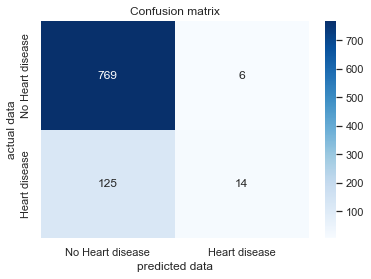

In [56]:
#plt.figure(figsize=(20,6))
output_labels=['No Heart disease','Heart disease']
sns.heatmap(cm,cmap='Blues',annot=True,fmt="",xticklabels=output_labels,yticklabels=output_labels)
plt.title('Confusion matrix')
plt.xlabel('predicted data')
plt.ylabel('actual data')
plt.show()